In [9]:
%pip install seaborn

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

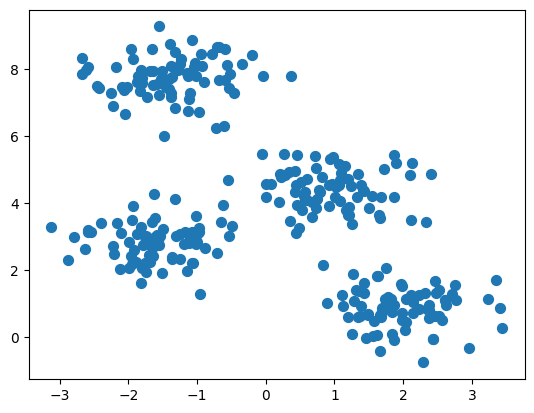

In [12]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


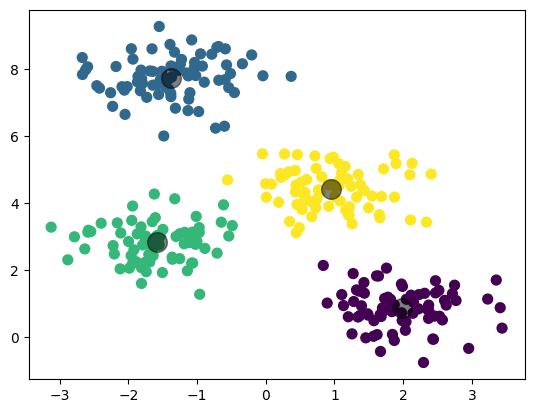

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Step {} 1


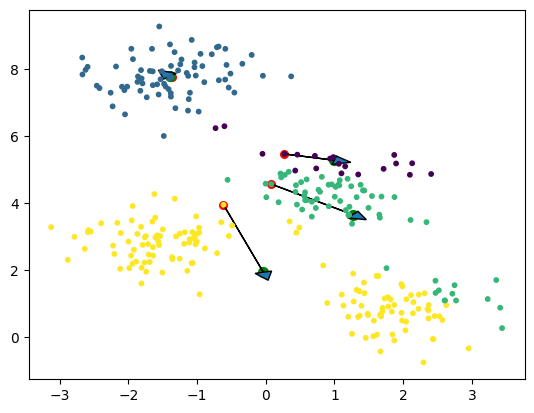

Step {} 2


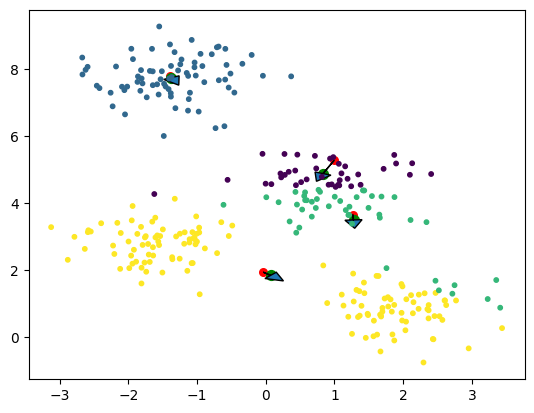

Step {} 3


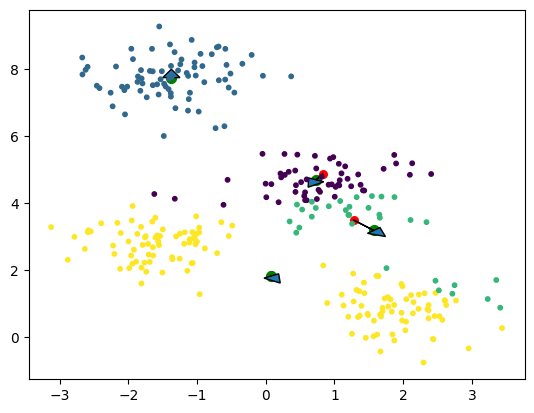

Step {} 4


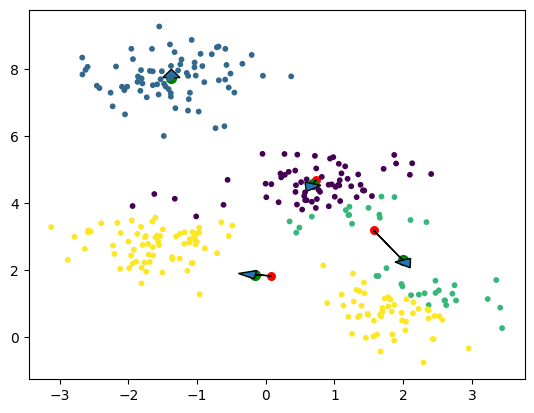

Step {} 5


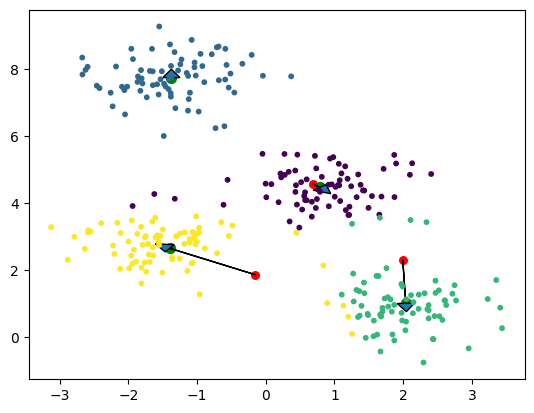

Step {} 6


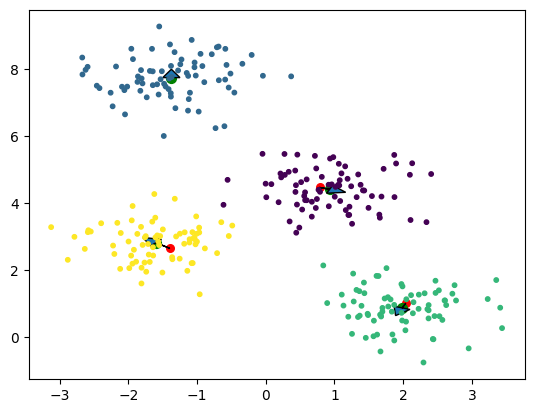

Step {} 7


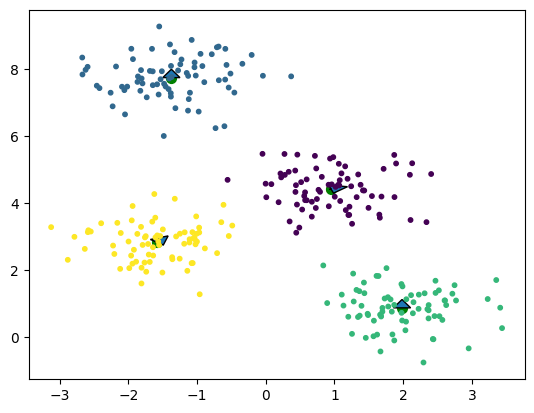

Step {} 8


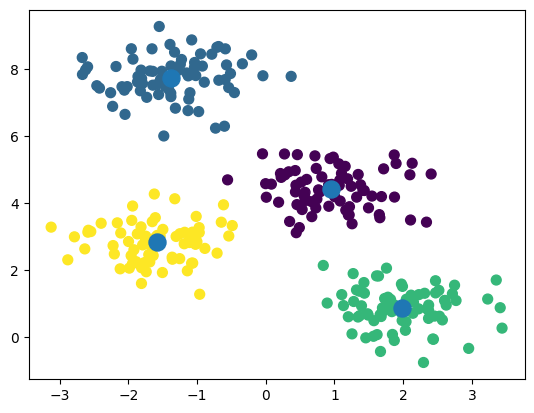

In [16]:
from sklearn.metrics import pairwise_distances_argmin
import time

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    step = 0
    while True:
        
        time.sleep(10)
        step = step + 1
        print('Step {}', (step))
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        plt.scatter(centers[:, 0], centers[:, 1], s=30, c='red');
        plt.scatter(new_centers[:, 0], new_centers[:, 1], s=50, c='green');

        for ind in range(0, n_clusters):
            plt.arrow(centers[ind, 0], centers[ind, 1], 
                      (-centers[ind, 0] + new_centers[ind,0]), (-centers[ind, 1] + new_centers[ind,1]),
                     head_width=0.25, head_length=0.25 )
        
        centers = new_centers
        #plt.scatter(centers[:, 0], centers[:, 1], s=150, cmap='viridis');
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis');
        plt.show()
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], s=150, cmap='viridis');
plt.show()